Name: Anurag Joardar
Roll No: B2330021
Dept: BDA(2023-25)

Question: Write your own logistic regression model for a binary classification problem and compare your results with those from the same model using scikit-learn.

# Libraries #

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics

# Logistic Regression Model From Scratch #

In [49]:
class LogisticRegression_Scratch:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # Binary Cross Entropy(BCE)
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iters):
            A = self.feed_forward(X)
            dz = A - y 

            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(A - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            cost = self.compute_loss(y, A)
            self.cost_history.append(cost)

            if i % 100 == 0:
                print(f"Epoch {i}, Cost: {cost}")
            
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
    
    def plot_cost_history(self):
        plt.plot(range(1, self.n_iters + 1), self.cost_history)
        plt.title("Cost History")
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()

# Accuracy of Scratch Model #

Epoch 0, Cost: 0.6931471785599453
Epoch 100, Cost: 0.6919973980739057
Epoch 200, Cost: 0.690853393344241
Epoch 300, Cost: 0.6897151347051461
Epoch 400, Cost: 0.6885825925619975
Epoch 500, Cost: 0.6874557373929204
Epoch 600, Cost: 0.6863345397503234
Epoch 700, Cost: 0.6852189702624
Epoch 800, Cost: 0.6841089996346004
Epoch 900, Cost: 0.6830045986510693
Test accuracy of Scratch Model: 0.500
RMSE is 0.39370039370059057


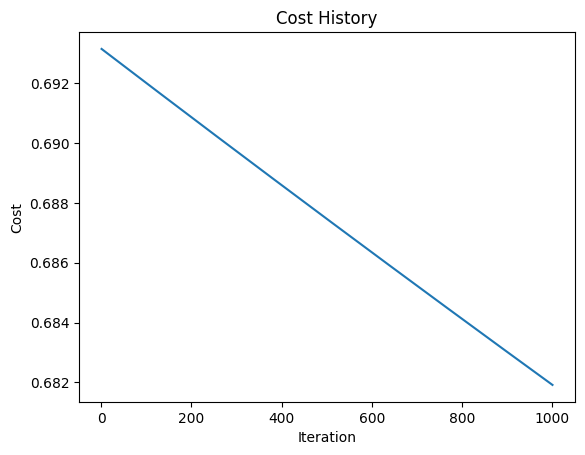

In [50]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=2) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1200)

#Normalizing Data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

reg = LogisticRegression_Scratch(learning_rate=0.0001, n_iters=1000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
accuracy=np.mean(predictions == y_test.reshape(-1, 1))
print("Test accuracy of Scratch Model: {0:.3f}".format(accuracy))

rmse_logregS=metrics.mean_squared_error(y_test,predictions,squared=False)
print('RMSE is',rmse_logregS)

reg.plot_cost_history()

# Accuracy of Scikit-Learn Model #

In [51]:
# Use scikit-learn's Logistic Regression

model_sklearn = linear_model.LogisticRegression()
model_sklearn.fit(X_train, y_train)

predictions_sklearn = model_sklearn.predict(X_test)

accuracy_sklearn = np.mean(predictions_sklearn == y_test)

print("Test accuracy of Scikit-Learn's Logistic Regression Model: {0:.3f}".format(accuracy_sklearn))

rmse_logreg=metrics.mean_squared_error(y_test,predictions_sklearn,squared=False)
print('RMSE is',rmse_logreg)


Test accuracy of Scikit-Learn's Logistic Regression Model: 0.840
RMSE is 0.4
